In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [74]:
!wget $data

--2025-10-09 00:41:20--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.1’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.008s  

2025-10-09 00:41:20 (102 MB/s) - ‘car_fuel_efficiency.csv.1’ saved [874188/874188]



In [75]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [76]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [77]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']


In [78]:
df = df[base]

In [79]:
df.columns

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year',
       'fuel_efficiency_mpg'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Fuel Efficiency')

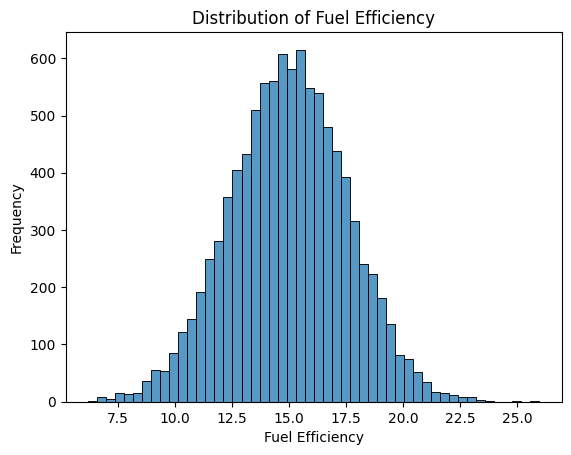

In [80]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)
plt.ylabel('Frequency')
plt.xlabel('Fuel Efficiency')
plt.title('Distribution of Fuel Efficiency')

Text(0.5, 1.0, 'Distribution of Fuel Efficiency after log transformation')

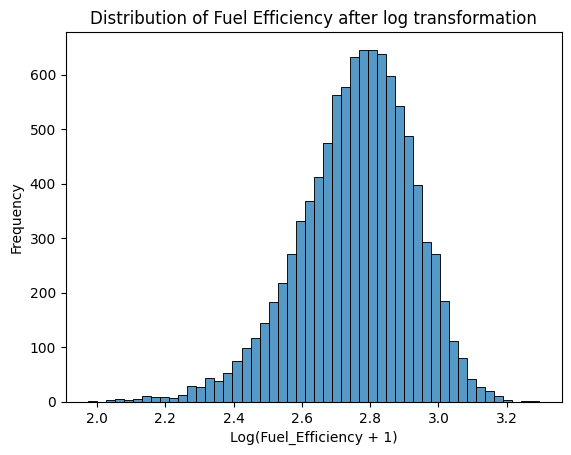

In [81]:
log_efficiency = np.log1p(df.fuel_efficiency_mpg)
sns.histplot(log_efficiency, bins=50)
plt.ylabel('Frequency')
plt.xlabel('Log(Fuel_Efficiency + 1)')
plt.title('Distribution of Fuel Efficiency after log transformation')

In [82]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [83]:
df.horsepower.median()
df.horsepower.describe()

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

In [84]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

In [85]:
df.iloc[idx]

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
5734,210,163.0,1972.029124,2011,19.961672
5191,160,126.0,3011.588014,2009,14.651056
5390,290,187.0,2440.508039,2019,18.404435
860,260,129.0,1865.404480,2019,20.502460


In [86]:
df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

len(df_shuffled), len(df_train), len(df_val), len(df_test)

(9704, 5824, 1940, 1940)

In [87]:
y_train_init = df_train.fuel_efficiency_mpg.values
y_val_init = df_val.fuel_efficiency_mpg.values
y_test_init = df_test.fuel_efficiency_mpg.values

y_train = y_train_init
y_val = y_val_init
y_test = y_test_init

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

LINEAR REGRESSION MODEL

In [88]:
def train_model(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

TRAINING MODEL WITH 0

In [89]:
df_shuffled.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [90]:
def prepare_X_zero(df):
    df_num = df.fillna(0)
    X = df_num.values
    return X

In [91]:
X_train = prepare_X_zero(df_train)
w0, w = train_model(X_train, y_train)

In [92]:
y_pred = w0 + X_train.dot(w)

In [93]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [94]:
rmse(y_train, y_pred)

np.float64(0.5202614265099076)

TRAINING WITH MEAN

In [95]:
df_train.horsepower.mean().round(4)

np.float64(149.5448)

In [96]:
df_train.isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

In [97]:
def prepare_X_mean(df):
    df_num = df.fillna(df.horsepower.mean())
    X = df_num.values
    return X

In [98]:
X_train = prepare_X_mean(df_train)
w0, w = train_model(X_train, y_train)

In [99]:
y_pred = w0 + X_train.dot(w)

In [100]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [101]:
rmse(y_train, y_pred)

np.float64(0.4624412137959964)

REGULARIZING LINEAR REGRESSION

In [102]:
def train_model_r(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [103]:
def prepare_X_zero(df):
    df_num = df.fillna(0)
    X = df_num.values
    return X


In [104]:

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X_zero(df_train)
    w0, w = train_model_r(X_train, y_train, r=r)

    X_val = prepare_X_zero(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print (r, w0, score)

0 28.827365475106156 0.5173782638857467
0.01 24.92683842008767 0.5171115525767522
0.1 11.239661084961272 0.5187525130701821
1 1.7315979411936366 0.5222348802092772
5 0.3638075020692219 0.5228916092823478
10 0.18306246622306527 0.5229812979636581
100 0.018418017306977234 0.5230636233819926


In [109]:
rmse_scores = []
val_rmse_scores = []

for seed in range(10): 
    np.random.seed(seed)

    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    # Extract target values
    y_train_init = df_train.fuel_efficiency_mpg.values
    y_val_init = df_val.fuel_efficiency_mpg.values
    y_test_init = df_test.fuel_efficiency_mpg.values


    y_train = y_train_init
    y_val = y_val_init
    y_test = y_test_init

    # Remove target from input features
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    # Prepare features
    def prepare_X_zero(df):
        df_num = df.fillna(0)
        X = df_num.values
        return X

    X_train = prepare_X_zero(df_train)

    # Train model
    w0, w = train_model(X_train, y_train)

    # Predict on training set
    y_pred = w0 + X_train.dot(w)

    # RMSE function
    def rmse(y, y_pred):
        error = y_pred - y
        mse = (error ** 2).mean()
        return np.sqrt(mse)

    # Compute RMSE and store result
    score = rmse(y_train, y_pred)
    rmse_scores.append((seed, score))
    val_rmse_scores.append(score)

# Print results
for seed, score in rmse_scores:
    print(f"Seed {seed}: RMSE (train score) = {score:.10f}")

std_val_rmse = np.std(val_rmse_scores)
print("Standard deviation of validation RMSEs:", round(std_val_rmse, 3))


Seed 0: RMSE (train score) = 0.5171560914
Seed 1: RMSE (train score) = 0.5148529296
Seed 2: RMSE (train score) = 0.5205583115
Seed 3: RMSE (train score) = 0.5198664820
Seed 4: RMSE (train score) = 0.5171675511
Seed 5: RMSE (train score) = 0.5195177528
Seed 6: RMSE (train score) = 0.5124114964
Seed 7: RMSE (train score) = 0.5247636300
Seed 8: RMSE (train score) = 0.5243063852
Seed 9: RMSE (train score) = 0.5219709782
Standard deviation of validation RMSEs: 0.004


In [108]:
np.std([0.517156, 0.514853, 0.520558, 0.519866, 0.517168, 0.519518, 0.512411, 0.524764, 0.524306, 0.521971])

np.float64(0.003746437012682869)

In [107]:
np.random.seed(9)

n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# Combine train and validation sets
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

# Extract target values
y_full_train_init = df_full_train.fuel_efficiency_mpg.values
y_test_init = df_test.fuel_efficiency_mpg.values

# Apply log transform
y_full_train = y_full_train_init
y_test = y_test_init

# Remove target from input features
del df_full_train['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

# Prepare features
def prepare_X_zero(df):
    return df.fillna(0).values

X_full_train = prepare_X_zero(df_full_train)

X_test = prepare_X_zero(df_test)

# Train model
w0, w = train_model_r(X_full_train, y_full_train, r=0.001)

# Predict on test set
y_pred = w0 + X_test.dot(w)

# RMSE function
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

# Compute RMSE and store result
score = rmse(y_test, y_pred)
score

np.float64(0.5156261299167999)